<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Comparative_ANNs/PSD_histogram_CNN_B_r_squared_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)
Img_Size = 28

In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     146  126.300804  138.789078  ...  186.979919  194.375885  207.060425
1     184  178.176743  187.679092  ...   77.279770  109.551041  127.960297
2     164  194.757889  194.801910  ...  176.362885  171.958359  173.856628
3     148   66.318489  118.151947  ...    0.576333    0.360117    1.414171
4     111   31.293888   27.945946  ...  118.664474  130.317352  143.243088
5     140  146.119995  141.080002  ...  124.879997  126.599998  130.520004
6     192  178.391052  185.423172  ...  146.263443  142.154495  133.990005
7     119   82.979248   87.885818  ...    1.000000    1.000000    1.000000
8     192  163.831161  162.668823  ...    1.396267    0.167535    1.312934
9     185  153.730011  158.259445  ...  144.989243  147.531250  136.773315
10    189  125.973938  126.023315  ...  226.581619  239.440338  250.748978
11    128  153.877930  168.488281  ...  233.003906  244.421875  248.764648
12    139  148.993011  16

In [11]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [12]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [13]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [14]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [15]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 32, 64, 128 '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:

# gives us back a <keras.callbacks.History object at 0x112e61a90>
model.fit(X_train, Y_train, epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 20s 49ms/step - loss: 0.6912 - accuracy: 0.6321
Epoch 2/200
11/11 [==============================] - 1s 47ms/step - loss: 0.3085 - accuracy: 0.8616
Epoch 3/200
11/11 [==============================] - 1s 48ms/step - loss: 0.1805 - accuracy: 0.9363
Epoch 4/200
11/11 [==============================] - 1s 46ms/step - loss: 0.1477 - accuracy: 0.9424
Epoch 5/200
11/11 [==============================] - 1s 46ms/step - loss: 0.0997 - accuracy: 0.9645
Epoch 6/200
11/11 [==============================] - 1s 50ms/step - loss: 0.0885 - accuracy: 0.9678
Epoch 7/200
11/11 [==============================] - 1s 48ms/step - loss: 0.0384 - accuracy: 0.9808
Epoch 8/200
11/11 [==============================] - 1s 48ms/step - loss: 0.0463 - accuracy: 0.9771
Epoch 9/200
11/11 [==============================] - 1s 47ms/step - loss: 0.0157 - accuracy: 0.9990
Epoch 10/200
11/11 [==============================] - 1s 46ms/step - loss: 0.0121 - accuracy: 0.998

In [17]:
Y_test = yback(Y_test)

In [18]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   1
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
44  118.0   76.873314   76.610176  ...   99.569374  103.894279  102.871017
5   118.0    1.841712    2.146222  ...   37.178688   34.897156   34.719044
8   177.0    0.452137    0.329886  ...   83.773109   84.853897   85.494141
21  134.0   83.529739   82.590118  ...   83.347290   84.561821   86.808640
9   152.0    2.920360    3.396814  ...   88.761078   79.566475   59.349716
20  116.0    1.000000    1.112961  ...   50.793106   40.526752   30.177170
5   152.0    0.510388    0.355263  ...   87.686279   86.876038   87.443901
2   155.0   73.558304  105.709221  ...   36.368080   38.419483   40.962585
29  172.0    0.000000    0.713899  ...    1.561385    0.109789    0.000000
42  103.0   75.305862   79.386559  ...   91.972382   94.817894   95.046936
9   106.0  104.775009   97.369530  ...   74.985397   78.296196   80.024918
35  106.0    0.596298    0.850481  ...   56.988964   59.566750   60.704521
37  101.0    0.000000    

In [21]:
Width=np.array(Width_new)

In [22]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [23]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [24]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [25]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
44,118.0,76.873314,76.610176,79.093941,81.842003,84.416550,83.567932,85.744324,86.733124,83.357941,78.301926,74.356506,68.087044,54.288418,39.357079,28.566790,20.505314,34.437225,111.192184,219.475998,110.952019,66.196503,117.289856,235.848328,245.504730,245.681396,241.362534,167.397873,48.766449,64.995117,62.954323,65.021538,68.016663,70.499855,72.199936,72.823326,73.941971,70.080147,65.674515,62.422581,...,92.909508,116.940529,132.194763,136.334381,140.767014,140.383224,116.238724,102.370872,102.693192,102.988495,104.078140,100.000572,97.223785,100.005173,103.135880,106.812408,108.708130,112.860382,118.794312,124.710999,131.869568,130.663605,76.096802,21.690033,26.016949,53.571098,89.326912,102.851761,110.742317,119.181267,127.180695,135.505310,146.049988,147.998840,118.097389,95.016090,98.100838,99.569374,103.894279,102.871017
5,118.0,1.841712,2.146222,2.016662,1.713875,0.494973,0.408791,1.719908,3.213732,5.386671,5.156852,3.764723,3.769894,3.608733,3.728814,3.724792,3.719621,2.565067,2.336397,1.688882,1.701522,2.313703,3.191037,2.441827,2.291296,1.825050,0.823039,0.987934,1.000000,0.729388,0.889112,0.613617,0.908360,0.890261,0.979891,1.374030,3.124102,4.883367,4.712152,5.591210,...,48.729671,48.403332,48.715599,48.685150,46.839993,39.824760,33.791149,28.887962,26.955759,25.690029,22.845446,18.193909,75.412811,74.029305,69.762703,64.611313,59.679688,54.259411,52.114906,48.747490,44.614479,39.940536,39.402756,41.305656,43.158577,44.093941,45.230392,46.751793,47.050846,47.602413,48.175522,48.735710,48.741165,47.913818,46.620224,43.686584,39.883080,37.178688,34.897156,34.719044
8,177.0,0.452137,0.329886,0.952440,0.888793,0.417664,0.602285,0.960899,0.839797,0.890038,0.712120,0.543586,0.665837,0.487631,0.949950,1.210923,1.591656,2.299659,5.755689,3.901720,3.330875,2.015960,0.835201,0.506336,0.467841,0.236841,0.445977,0.000000,0.224329,0.588177,0.422261,1.419356,1.612468,0.396534,0.879281,1.141434,1.512401,2.303616,3.266622,3.668358,...,36.038174,59.436554,76.688583,80.530968,81.712814,82.670517,84.470879,83.975540,82.441948,82.580162,84.126717,84.079918,85.365341,84.487312,83.187935,73.610352,56.692261,55.198627,55.492924,51.038715,51.819080,54.056301,55.907459,55.743015,57.162014,56.563782,56.715569,54.348682,55.856678,72.850388,79.312035,79.944489,77.953674,78.155014,82.137115,83.298531,82.513260,83.773109,84.853897,85.494141
21,134.0,83.529739,82.590118,80.560043,72.078857,57.852974,51.929604,53.814667,54.315437,54.575188,55.627987,58.116734,60.735580,61.351753,61.582981,58.219208,51.355316,49.324795,49.226334,50.016937,51.975502,41.569168,15.073736,9.202050,11.624861,23.713524,40.963688,54.233238,63.222767,67.780128,60.076408,53.263977,47.586990,42.054356,44.723545,52.088661,57.983070,63.112057,68.455338,76.760529,...,109.518837,108.834488,105.279579,106.771667,110.707954,108.629089,99.994431,70.260864,67.080872,82.729790,86.460243,89.645355,57.359550,40.855202,66.677658,95.409225,101.914688,102.399422,104.356873,100.982399,96.891296,98.014481,98.879044,103.338829,107.288040,106.887512,105.860558,107.719757,112.062820,111.401649,111.698822,108.876366,108.394302,104.393410,95.980179,78.515709,76.779243,83.347290,84.561821,86.808640
9,152.0,2.920360,3.396814,2.459834,2.776315,2.630194,4.180055,3.509003,0.631579,1.909280,4.770775,5.585873,1.448754,0.743075,2.047091,5.215374,2.180055,3.103186,3.494460,5.332410,6.759695,7.833794,22.739613,48.816483,65.729225,75.875343,83.390579,92.802628,100.195290,1.358033,1.414127,1.339335,2.031856,1.588643,1.250000,0.921745,0.747922,1.021468,1.794321,3.166897,...,82.793633,86.106651,87.816475,90.230614,92.027695,92.918976,93.191124,92.718834,91.008987,90.090714,84.815788,77.058167,55.022850,65.159279,74.263153,76.148888,

In [26]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [27]:
X.shape

(490, 784)

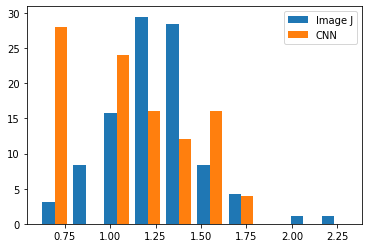

In [28]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.03157895, 0.11578947, 0.27368421, 0.56842105, 0.85263158,
         0.93684211, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.28      , 0.28      , 0.52      , 0.68      , 0.8       ,
         0.96      , 1.        , 1.        , 1.        , 1.        ]]),
 array([0.60947139, 0.78026817, 0.95106495, 1.12186173, 1.29265851,
        1.46345529, 1.63425207, 1.80504885, 1.97584563, 2.14664241,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

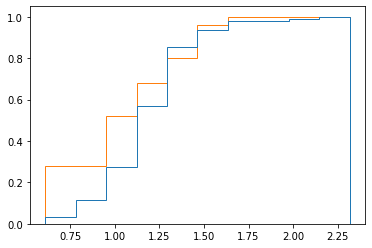

In [29]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.8803693270235976


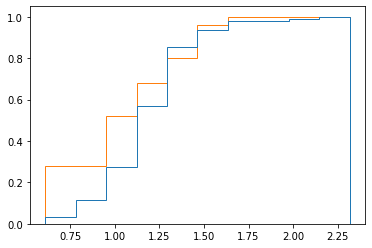

In [30]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [37]:

df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,'Details':Description},
                  index= [0])
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
df

,N1,N2,R^2,Details
0,200,10,0.880369,"3 layers of Convolution: 32, 64, 128"


<a list of 2 Lists of Patches objects>
[0.60947139 0.78026817 0.95106495 1.12186173 1.29265851 1.46345529
 1.63425207 1.80504885 1.97584563 2.14664241 2.31743919]
[[ 3.15789474  8.42105263 15.78947368 29.47368421 28.42105263  8.42105263
   4.21052632  0.          1.05263158  1.05263158]
 [28.          0.         24.         16.         12.         16.
   4.          0.          0.          0.        ]]


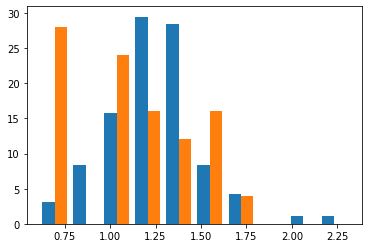

In [33]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [34]:
print(counts.sum())

200.0000000000001


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


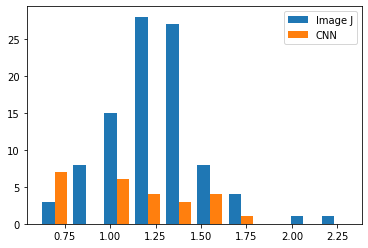

In [35]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [36]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1